In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pizza_df = pd.read_csv('/content/Pizza_Sale - pizza_sales.csv')
ingred_df = pd.read_csv('/content/Pizza_ingredients - Pizza_ingredients.csv')

In [3]:
pizza_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
pizza_df.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,16
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,7
pizza_size,0
pizza_category,23


In [6]:
pizza_df.duplicated().sum()

np.int64(0)

In [8]:
pizza_df.dropna(inplace=True)

In [9]:
pizza_df.isna().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [7]:
pizza_df.shape

(48620, 12)

In [55]:
ingred_df.columns

Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

In [11]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

In [12]:
pizza_df['order_date'] = pizza_df['order_date'].apply(parse_dates)

In [13]:
pizza_df['order_date'].head()

,order_date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01


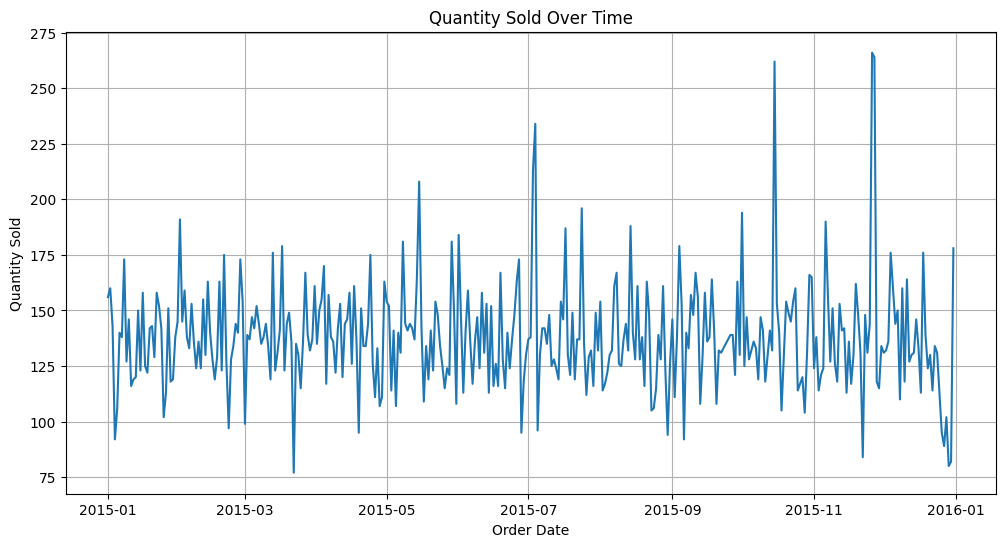

In [14]:
# Group by order date and sum the quantity
quantity_over_time = pizza_df.groupby('order_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')
plt.grid(True)
plt.show()


In [15]:
pizza_df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

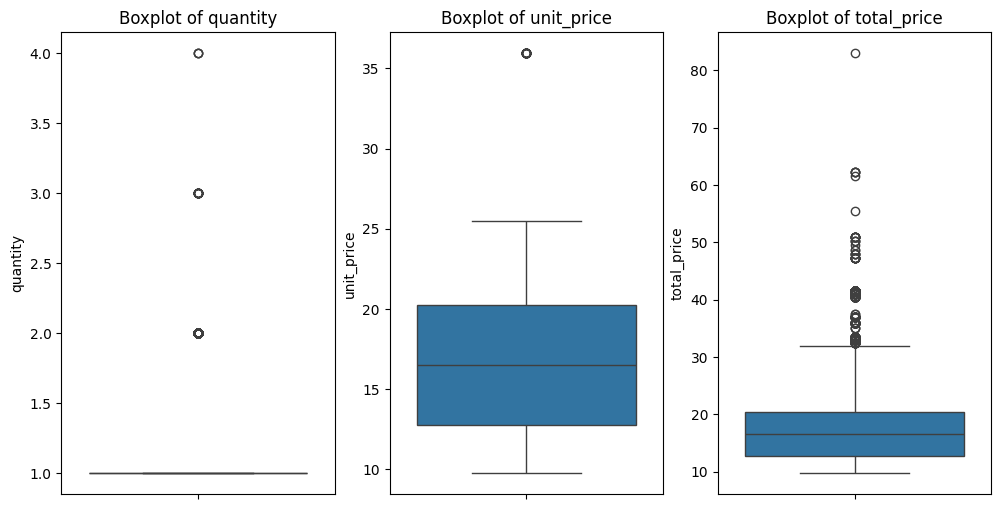

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check
num_cols = ['quantity', 'unit_price', 'total_price']

# Plot boxplots
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=pizza_df[col])
    plt.title(f'Boxplot of {col}')
plt.show()


In [17]:
import numpy as np

def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Detect outliers in quantity, unit_price, total_price
for col in num_cols:
    outliers = detect_outliers_iqr(pizza_df, col)
    print(f"Outliers in {col}: {len(outliers)} rows")


Outliers in quantity: 927 rows
Outliers in unit_price: 28 rows
Outliers in total_price: 613 rows


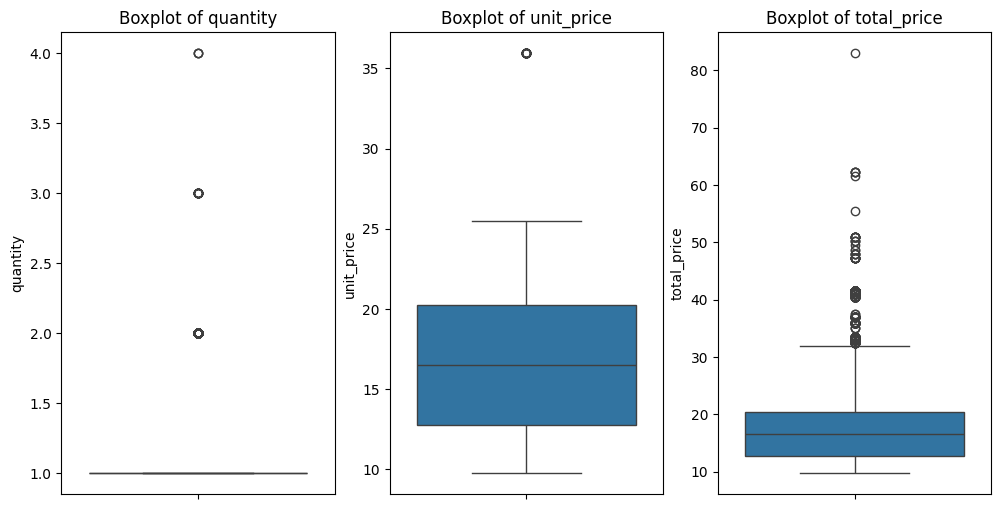

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check
num_cols = ['quantity', 'unit_price', 'total_price']

# Plot boxplots
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=pizza_df[col])
    plt.title(f'Boxplot of {col}')
plt.show()


In [19]:
import numpy as np

def replace_outliers_with_median(data, col):
    """Replace outliers in a numerical column using the IQR method and median value."""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Compute median
    median_value = data[col].median()

    # Replace outliers with median
    data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = median_value
    return data

# List of numeric columns to apply the function
num_cols = ['quantity', 'unit_price', 'total_price']

# Apply replacement to all numeric columns
for col in num_cols:
    pizza_df = replace_outliers_with_median(pizza_df, col)


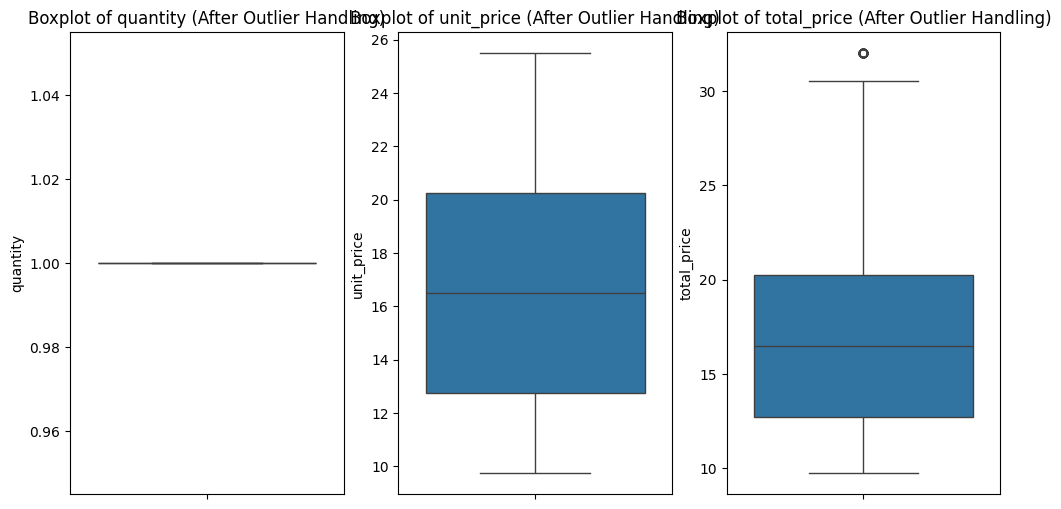

In [20]:
# Boxplot visualization after handling outliers
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=pizza_df[col])
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
plt.show()


In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


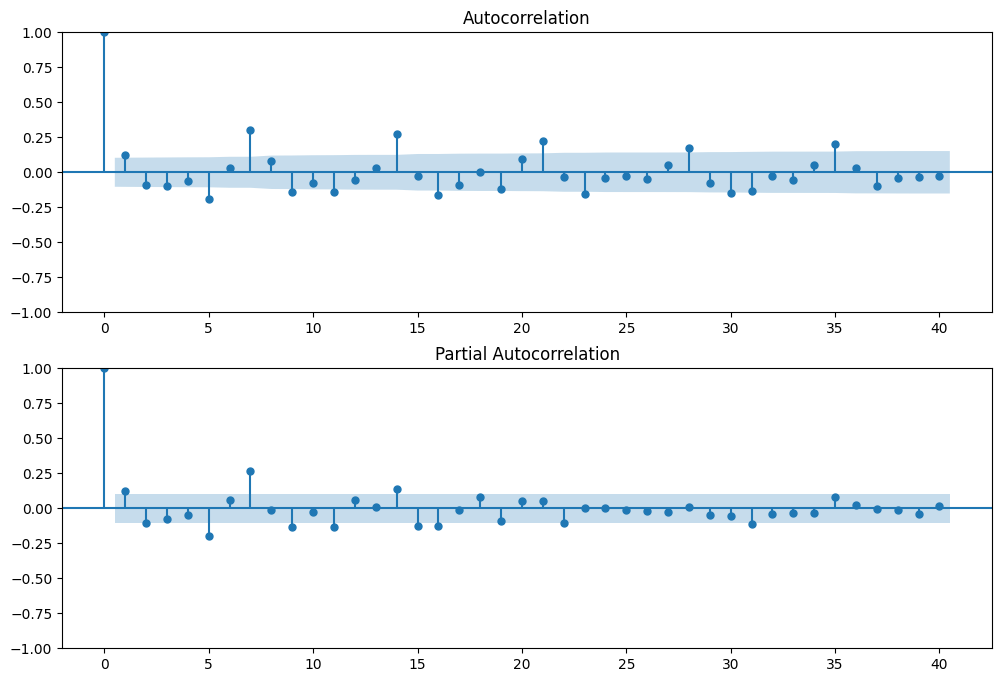

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(quantity_over_time, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(quantity_over_time, lags=40, ax=ax2)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [25]:
# H0: it is not stationary
# H1: it is stationary

def adf_test(sales):
  result = adfuller(sales)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print(f'# Lags used: {result[2]}')
  print(f'No of observations used: {result[3]}')
  if result[1] <= 0.05:
    print('we reject the null hypothesis, The series is stationary')
  else:
    print('Not enough statistical evidence to reject null hypothesis, The series is not stationary')


In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(quantity_over_time)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
    print("Series is stationary (d=0)")
else:
    print("Series is non-stationary, apply differencing (d=1 or higher)")


ADF Statistic: -5.208669713882251
p-value: 8.440743456858275e-06
Series is stationary (d=0)


In [26]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(quantity_over_time)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -5.208669713882251
p-value: 8.440743456858275e-06


In [27]:
# H0: it is not stationary
# H1: it is stationary

def adf_test(sales):
  result = adfuller(sales)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print(f'# Lags used: {result[2]}')
  print(f'No of observations used: {result[3]}')
  if result[1] <= 0.05:
    print('we reject the null hypothesis, The series is stationary')
  else:
    print('Not enough statistical evidence to reject null hypothesis, The series is not stationary')

In [28]:
adf_test(quantity_over_time)

ADF Statistic: -5.208670
p-value: 0.000008
# Lags used: 15
No of observations used: 342
we reject the null hypothesis, The series is stationary


In [29]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:

eval_data = pizza_df.groupby(['order_date', 'pizza_name'])['quantity'].sum().unstack().fillna(0)

In [31]:
eval_data.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,7.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,9.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,5.0,7.0,0.0,1.0,11.0,4.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,5.0,6.0,1.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0


In [32]:
one_pizza = eval_data['The Barbecue Chicken Pizza']

In [33]:
# split train and test
train = one_pizza[:-7]
test = one_pizza[-7:]


In [34]:
# Fit Arima model
ari_model = ARIMA(train, order=(1, 1, 0))
ari_result = ari_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
# forecast
ari_forecast = ari_result.get_forecast(steps=len(test))
ari_fore_values = ari_forecast.predicted_mean

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
ari_predict = ari_result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
ari_predict.index = test.index


In [38]:
# concat test and ari_predict without changing the index of test, test is a pandas series

concatenated_series = pd.concat([test, ari_predict], axis=1)
concatenated_series.columns = ['Actual', 'Predicted']
concatenated_series

,Actual,Predicted
order_date,,
2015-12-24,4.0,4.966872
2015-12-26,5.0,5.500549
2015-12-27,4.0,5.224870
2015-12-28,2.0,5.367276
2015-12-29,4.0,5.293714
2015-12-30,5.0,5.331714
2015-12-31,9.0,5.312085


In [39]:
# Evaluate the model
mae = mean_absolute_error(test, ari_fore_values)
mse = mean_squared_error(test, ari_fore_values)
rmse = np.sqrt(mse)

print(f'ARIMA MAE: {mae}')
print(f'ARIMA MSE: {mse}')
print(f'ARIMA RMSE: {rmse}')

ARIMA MAE: 1.6247014857938231
ARIMA MSE: 4.201242288826717
ARIMA RMSE: 2.0496932182223557


In [40]:
sales_summary = pizza_df.groupby(['order_date', 'pizza_name']).sum().reset_index()

In [41]:
sales_summary.head()

,order_date,pizza_name,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients
0,2015-01-01,The Barbecue Chicken Pizza,963,397,bbq_ckn_sbbq_ckn_lbbq_ckn_lbbq_ckn_mbbq_ckn_lb...,11,12:29:3613:02:5913:53:0014:23:0115:11:1715:54:...,204.25,204.25,SLLMLLMLMML,ChickenChickenChickenChickenChickenChickenChic...,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,2015-01-01,The Big Meat Pizza,422,173,big_meat_sbig_meat_sbig_meat_sbig_meat_sbig_me...,5,13:33:0014:03:0815:53:1817:28:0920:52:08,60.00,60.00,SSSSS,ClassicClassicClassicClassicClassic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
2,2015-01-01,The Calabrese Pizza,44,17,calabrese_m,1,13:53:00,16.25,16.25,M,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ..."
3,2015-01-01,The California Chicken Pizza,116,46,cali_ckn_lcali_ckn_mcali_ckn_lcali_ckn_s,4,13:02:5913:02:5913:04:4113:04:41,71.00,71.00,LMLS,ChickenChickenChickenChicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,2015-01-01,The Chicken Alfredo Pizza,179,71,ckn_alfredo_sckn_alfredo_m,2,15:35:4617:38:34,29.50,29.50,SM,ChickenChicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."


In [42]:
# reshape data for time series modeling
sales_pivot = sales_summary.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)

In [43]:
arima_models = {}

for pizza_name in sales_pivot.columns:
  try:
    model = ARIMA(sales_pivot[pizza_name], order=(1, 1, 0))
    model_fit = model.fit()
    arima_models[pizza_name] = model_fit
  except:
    print(f'ARIMA model for {pizza_name} failed to fit')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
#Generate predictions for one week
prediction_days = 7
predictions_arima = {}

for pizza_name, model in arima_models.items():
  predictions_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + prediction_days - 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa

In [45]:
predictions_df = pd.DataFrame(predictions_arima)

In [46]:
predictions_df.index = pd.date_range(start=sales_pivot.index[-1], periods=prediction_days, freq='D')

In [47]:
ingredients_df = ingred_df[['pizza_name', 'pizza_ingredients', 'Items_Qty_In_Grams']]

In [48]:
# change column name to items_qty
ingredients_df.rename(columns={'Items_Qty_In_Grams': 'items_qty'}, inplace=True)

In [49]:
predictions_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-31,6.938365,3.416414,0.864398,1.368535,7.0,2.523880,2.138622,5.942588,2.995402,6.025712,...,3.054202,2.579133,2.053615,5.917280,5.331181,3.040721,2.0,3.155058,3.0,7.352323
2016-01-01,8.000950,4.252329,1.509194,2.255761,7.0,3.250190,3.004804,7.000824,4.000005,7.500110,...,4.000734,3.751252,2.501437,5.496579,6.518280,3.500829,2.0,4.006011,3.0,8.520689
2016-01-02,7.453284,3.811081,1.143078,1.773268,7.0,2.892816,2.601731,6.456517,3.496549,6.769229,...,3.540295,3.183743,2.289531,5.689529,5.990255,3.280143,2.0,3.613521,3.0,8.005113
2016-01-03,7.735556,4.043999,1.350959,2.035658,7.0,3.068659,2.789299,6.736483,3.748856,7.131538,...,3.764275,3.458516,2.389804,5.601035,6.225122,3.385993,2.0,3.794551,3.0,8.232626
2016-01-04,7.590071,3.921051,1.232924,1.892965,7.0,2.982137,2.702015,6.592482,3.622412,6.951936,...,3.655320,3.325478,2.342356,5.641622,6.120652,3.335223,2.0,3.711054,3.0,8.132229
2016-01-05,7.665055,3.985950,1.299944,1.970565,7.0,3.024709,2.742632,6.666549,3.685779,7.040967,...,3.708321,3.389892,2.364808,5.623007,6.167121,3.359574,2.0,3.749566,3.0,8.176532
2016-01-06,7.626407,3.951692,1.261890,1.928364,7.0,3.003762,2.723731,6.628453,3.654023,6.996833,...,3.682539,3.358704,2.354183,5.631544,6.146451,3.347894,2.0,3.731803,3.0,8.156982


In [50]:
ingredients_df.head()

,pizza_name,pizza_ingredients,items_qty
0,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,The Barbecue Chicken Pizza,Red Peppers,15.0
2,The Barbecue Chicken Pizza,Green Peppers,20.0
3,The Barbecue Chicken Pizza,Tomatoes,30.0
4,The Barbecue Chicken Pizza,Red Onions,60.0


In [51]:
# Create a dictionary to store the ingredient quantities
ingredient_quantities = {}

# Iterate through each pizza in the predictions
for pizza_name in predictions_df.columns:
  # Get the predicted quantity for the pizza
  predicted_quantity = predictions_df[pizza_name].sum()

  # Get the ingredients for the pizza
  pizza_ingredients = ingredients_df[ingredients_df['pizza_name'] == pizza_name]

  # Iterate through each ingredient for the pizza
  for index, row in pizza_ingredients.iterrows():
    ingredient = row['pizza_ingredients']
    ingredient_qty = row['items_qty']

    # Calculate the required quantity of the ingredient
    required_quantity = predicted_quantity * ingredient_qty

    # Add the required quantity to the dictionary
    if ingredient not in ingredient_quantities:
      ingredient_quantities[ingredient] = 0
    ingredient_quantities[ingredient] += required_quantity

In [52]:
# Create a DataFrame from the ingredient quantities
ingredient_requirements_df = pd.DataFrame.from_dict(ingredient_quantities, orient='index', columns=['required_quantity'])




In [53]:
# Print the ingredient requirements
ingredient_requirements_df


,required_quantity
Barbecued Chicken,4770.871950
Red Peppers,10734.334304
Green Peppers,7530.834351
Tomatoes,33613.624133
Red Onions,52366.459360
...,...
Luganega Sausage,2765.606225
Onions,1382.803112
Soppressata Salami,4888.720237
Peperoncini verdi,1274.971855


In [54]:
# Create a purchase order DataFrame
purchase_order_df = ingredient_requirements_df.copy()

# Add a column for the unit of measure (assuming all ingredients are in grams)
purchase_order_df['unit'] = 'grams'

# Rename the columns for better readability
purchase_order_df = purchase_order_df.rename(columns={'required_quantity': 'quantity'})

# Add a header to the purchase order
print('Purchase Order:')
print('----------------')

# Print the purchase order table
print(purchase_order_df.to_string())


Purchase Order:
----------------
                                quantity   unit
Barbecued Chicken            4770.871950  grams
Red Peppers                 10734.334304  grams
Green Peppers                7530.834351  grams
Tomatoes                    33613.624133  grams
Red Onions                  52366.459360  grams
Barbecue Sauce               1590.290650  grams
Bacon                       16533.829686  grams
Pepperoni                   22178.471782  grams
Italian Sausage               273.825167  grams
Chorizo Sausage              1369.125837  grams
Brie Carre Cheese             259.871650  grams
Prosciutto                    259.871650  grams
Caramelized Onions                   NaN  grams
Pears                          86.623883  grams
Thyme                          43.311942  grams
Garlic                      17341.987960  grams
?duja Salami                 1587.013890  grams
Pancetta                     2380.520835  grams
Friggitello Peppers           396.753472  grams
Chicken